In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('SA_AAL_estPropA.csv')
# dropping descriptor with strange values (does not actually affect PCA output)
df.shape

(78, 78)

In [9]:
# Input Data Processing
for column in df:
    if df[column].dtype == np.object_:
        df[column] = df[column].str.replace('\+AC0-', '-').astype(float)
df = df.fillna(1)
for i in range(78):
    for j in range(78):
        if df.iloc[i,j] < 0:
            df.iloc[i,j] = 0
        if df.iloc[i,j] > 1:
            df.iloc[i,j] = 1

In [27]:
# Separating out & normalizing the features
x = df.iloc[:, :].values
x = preprocessing.scale(x)
y = 
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78'],
      dtype='object')

In [14]:
targets = list(df.columns)
#targets

In [26]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
#finalDf = pd.concat([principalDf, list(df.columns)], axis = 1)
#finalDf = pd.concat([principalDf, df[['ID']]], axis = 1)
pca.explained_variance_ratio_

array([ 0.20523434,  0.06895159])

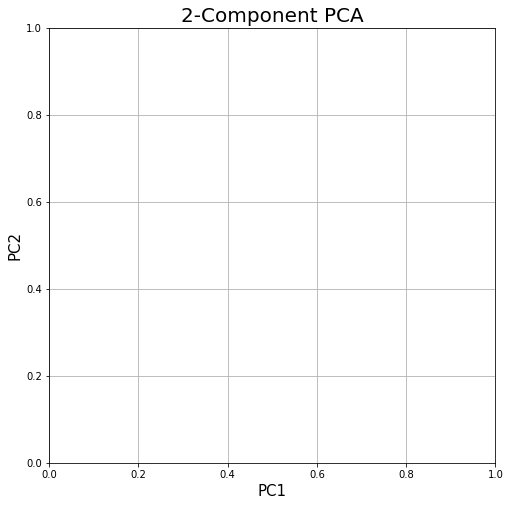

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2-Component PCA', fontsize = 20)
for target in targets:
#     indicesToKeep = finalDf['ID'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
#                , finalDf.loc[indicesToKeep, 'PC2']
#                #, c = color
#                , s = 50)
ax.grid()

In [ ]:
##### TEST: How many components to select ##### 

In [187]:
    ### Testing 7 components ### 
        # pca = PCA(n_components=7)
        # principalComponents = pca.fit_transform(x)
        # principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
        # pca.explained_variance_ratio_
            # OUTPUT: array([ 0.23354774,  0.11475039,  0.06810382,  0.04120661,  0.03132366,
                #0.02704538,  0.02453726])

array([ 0.23354774,  0.11475039,  0.06810382,  0.04120661,  0.03132366,
        0.02704538,  0.02453726])

In [ ]:
    ### Conclusion ### 
        # We selected the first two principal components (PCs) because the additional components
        # explain less than 7% of the variance 
        # (PC1: 23.4% of the variance; P2: 11.5% of the variance).

In [18]:
finalDf = pd.concat([principalDf, list(df.columns)], axis = 1)

TypeError: cannot concatenate a non-NDFrame object

KeyError: False

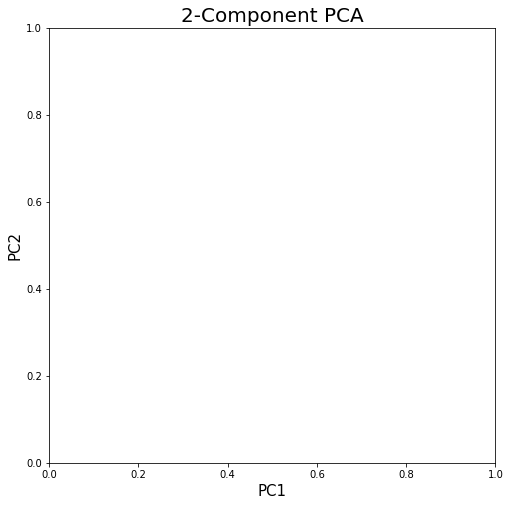

In [21]:
### PLOT: 2 Component PCA ###
        # x-axis = PC1, y-axis=PC2, data point = how much COMPOUND (NOT feature) is influenced by PCs 1 and 2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2-Component PCA', fontsize = 20)
for target in targets:
    indicesToKeep = list(df.columns) == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               #, c = color
               , s = 50)
ax.grid()

In [7]:
### Variance explained by each component ###
pca.explained_variance_ratio_
    # OUTPUT: array([ 0.23354774,  0.11475039])

array([ 0.233734  ,  0.11484077])

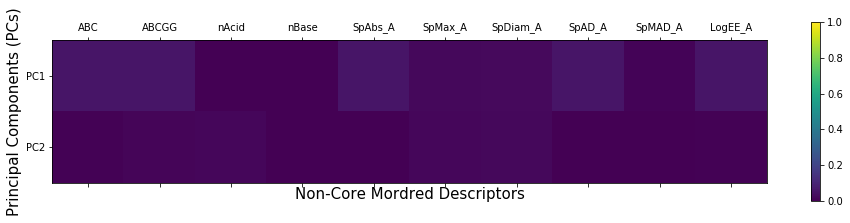

In [17]:
### FUNCTION to generate heat map of each PC explained by descriptors ###

def heat_map(ar, n,m):
    c = np.delete(ar,0,0)
    c = c.astype(np.float)
    plt.matshow(c,cmap='viridis',vmin=n,vmax=m)
    plt.yticks([0,1],['PC1','PC2'],fontsize=10)
    t = c.shape[1]
    
    plt.xticks(range(int(t)), ar[0])
    plt.xlabel("Non-Core Mordred Descriptors", fontsize = 15)
    plt.ylabel("Principal Components (PCs)", fontsize = 15)
    plt.colorbar()
    plt.show()

### Example: first 10 descriptors ###
b = np.asarray(pca.components_[0,0:10])
c = np.asarray(pca.components_[1,0:10])
a = df.columns[1:11]
d = [a,b,c]
heat_map(d, 0, 1)

In [19]:
### How much each feature contributes to each component
pca.components_
a = np.asarray(pca.components_)
a.shape

(2, 1402)

In [20]:
##### Important Feature Extraction #####
    # Function: Thresholds & Displays the Data
    # c: array where rows = components, columns = descriptors, entries = contribution of descriptor to respective component
def data_threshold(c,n, min, max):
    threshold = n
    d = c[1,:].astype(float) + c[2,:].astype(float)
    d=d.reshape(1,c.shape[1])
    d = np.vstack((d, d, d))
    e=c[d > n]
    e=np.asarray(e)
    t = e.shape[0]

    # number of descriptors that respect the threshold
    t= t/3
    print(t)

    f=(e[0:int(t)])
    g=(e[int(t):int(2*t)])
    h=(e[int(2*t):int(3*t)])

        # creating array with only columns from c that respect threshold!
    final = np.vstack((f, g, h))
    ###print(final.shape)
    pd.DataFrame(final).to_csv("descript_"+str(n)+".csv")
    heat_map(final,min,max)

10.0


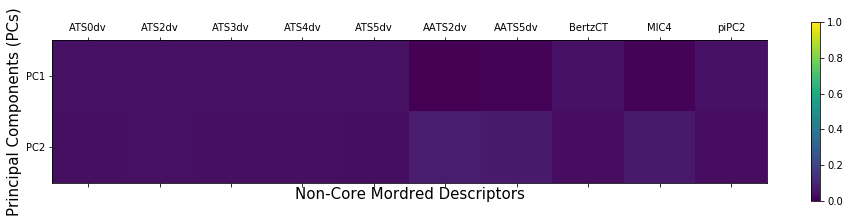

In [22]:
#### TEST: Thresholding & Displaying Data
features = list(df.columns)
features.pop(0)
features
b = []
b.append(features)
b.append(a[0])
b.append(a[1])
c = np.asarray(b)
c.shape
data_threshold(c, 0.08,0,1)

In [18]:
print(c.shape)

(3, 1402)
